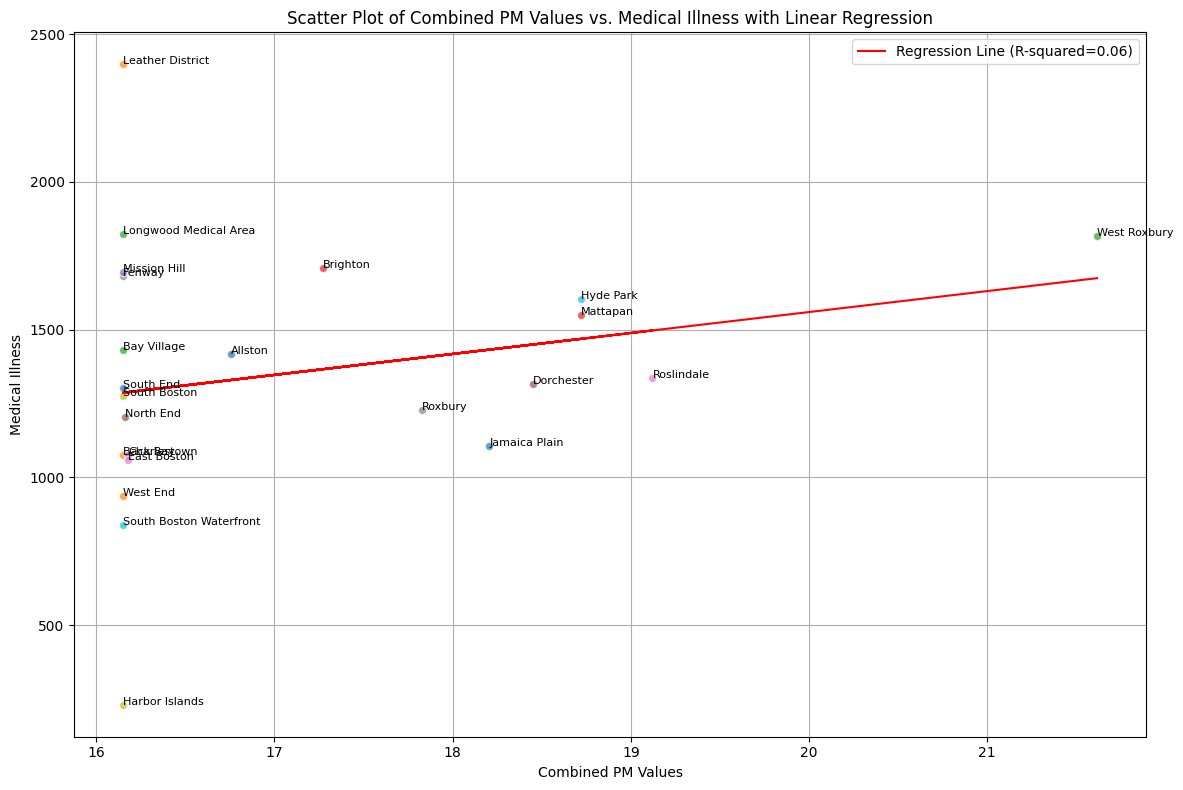

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Load the data from the CSV file
file_path = "../data/boston_dem.csv"
data = pd.read_csv(file_path)

# Calculate the combined PM values
data['Combined_PM'] = data['pm2.5_atm'] + data['pm10_atm']

# Group data by area name and calculate the mean for combined PM and medical illness
aggregated_data = data.groupby('Name').agg({'Combined_PM': 'mean', 'MedIllnes': 'mean'}).reset_index()

# Create a scatter plot with annotations
plt.figure(figsize=(12, 8))
for i, row in aggregated_data.iterrows():
    plt.scatter(row['Combined_PM'], row['MedIllnes'], alpha=0.7, edgecolors='w')
    plt.annotate(row['Name'], (row['Combined_PM'], row['MedIllnes']), fontsize=8)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(aggregated_data['Combined_PM'], aggregated_data['MedIllnes'])
x = np.array(aggregated_data['Combined_PM'])
y = slope * x + intercept

# Plot the regression line
plt.plot(x, y, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')

# Set labels and title
plt.xlabel('Combined PM Values')
plt.ylabel('Medical Illness')
plt.title('Scatter Plot of Combined PM Values vs. Medical Illness with Linear Regression')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


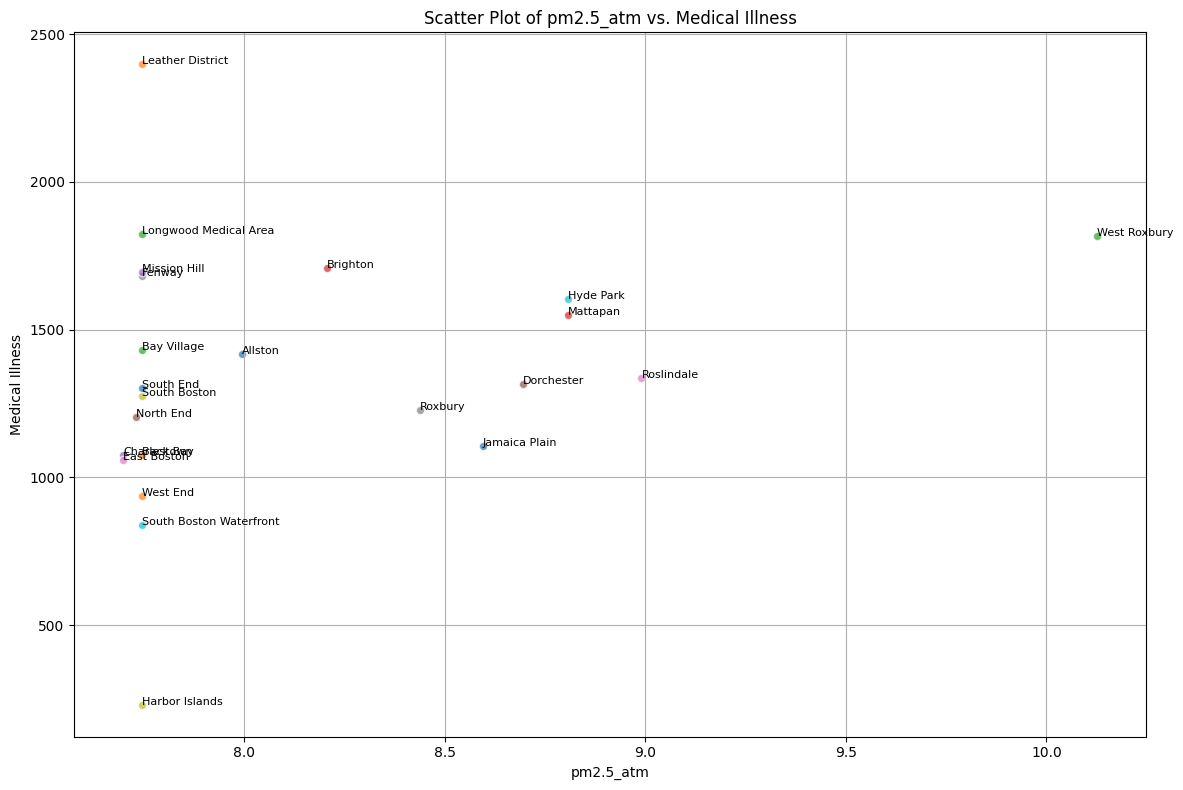

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
file_path = "../data/boston_dem.csv"
data = pd.read_csv(file_path)

# Group data by area name and calculate the mean for 'pm2.5_atm' and 'MedIllnes'
aggregated_data = data.groupby('Name').agg({'pm2.5_atm': 'mean', 'MedIllnes': 'mean'}).reset_index()

# Create a scatter plot with annotations
plt.figure(figsize=(12, 8))
for i, row in aggregated_data.iterrows():
    plt.scatter(row['pm2.5_atm'], row['MedIllnes'], alpha=0.7, edgecolors='w')
    plt.annotate(row['Name'], (row['pm2.5_atm'], row['MedIllnes']), fontsize=8)

# Set labels and title
plt.xlabel('pm2.5_atm')
plt.ylabel('Medical Illness')
plt.title('Scatter Plot of pm2.5_atm vs. Medical Illness')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


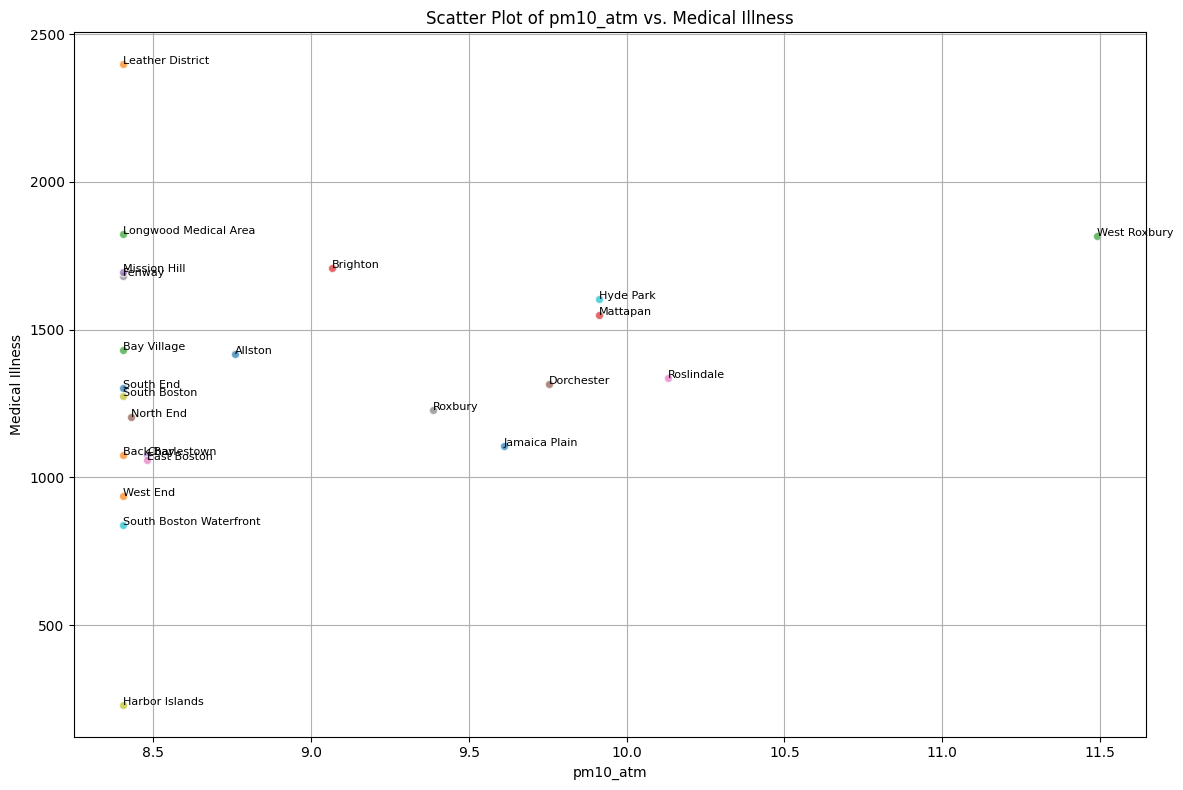

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
file_path = "../data/boston_dem.csv"
data = pd.read_csv(file_path)

# Group data by area name and calculate the mean for 'pm10_atm' and 'MedIllnes'
aggregated_data = data.groupby('Name').agg({'pm10_atm': 'mean', 'MedIllnes': 'mean'}).reset_index()

# Create a scatter plot with annotations
plt.figure(figsize=(12, 8))
for i, row in aggregated_data.iterrows():
    plt.scatter(row['pm10_atm'], row['MedIllnes'], alpha=0.7, edgecolors='w')
    plt.annotate(row['Name'], (row['pm10_atm'], row['MedIllnes']), fontsize=8)

# Set labels and title
plt.xlabel('pm10_atm')
plt.ylabel('Medical Illness')
plt.title('Scatter Plot of pm10_atm vs. Medical Illness')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
